In [4]:
import numpy as np
np.random.seed(42)

Let's look at a random set of 10 2-dimensional points, and plot them on a 2-dimensional plane.

In [5]:
X = np.random.rand(10, 2)
X.shape

(10, 2)

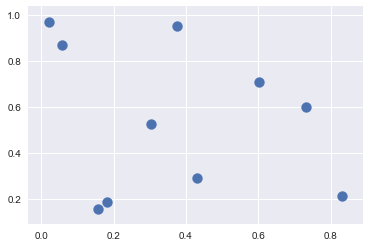

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [17]:
col_vec = X[:, np.newaxis, :]
col_vec.shape

(10, 1, 2)

In [18]:
row_vec = X[np.newaxis, :, :]
row_vec.shape

(1, 10, 2)

In [27]:
diff = col_vec - row_vec # Using brodcasting: subtracting a row of points from a column of points: we get a matrix
# diff[i, j, 0] contains del_x_ij = x_i - x_j; diff[i, j, 1] contains del_y_ij = y_i - j_j
diff.shape

(10, 10, 2)

In [25]:
sq_diff = diff ** 2
# sq_diff[i, j, 0] containes del_x = (x_i - x_j) ** 2; sq_diff[i, j, 1] contains del_y = (y_i - y_j) ** 2
sq_diff.shape

(10, 10, 2)

In [26]:
dist_sq = sq_diff.sum(-1)
# summing along the last axis, we get sq_del_x + sq_del_y, or the squared distance
dist_sq.shape

(10, 10)

In [22]:
# verify: the diagonal of the matrix is the squared distance from a point to itself, which should be zero
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [29]:
# Use `argsort` to sort each row.  The elements in row `i` are sorted by distance from point `i`.
nearest_sorted_idx = np.argsort(dist_sq, axis=1)
nearest_sorted_idx

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

The first column of row `i` contains the index of point `i`, which makes sense, as a point is closest to itself.

We actually have a full sort, when all we needed was *k*-nearest points.  We could, instead of a sort, partition each row so that the smallest `k + 1` sqaured distances come first, with larger distances filling the remaining positions of the array.  We can do this like so:

In [30]:
K = 2
nearest_partition_idx = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition_idx

array([[3, 0, 4, 5, 8, 9, 1, 7, 2, 6],
       [1, 4, 6, 9, 3, 5, 2, 7, 8, 0],
       [2, 7, 9, 8, 6, 4, 5, 1, 3, 0],
       [3, 5, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 4, 0, 8, 9, 6, 2, 7, 5, 3],
       [5, 3, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 9, 6, 4, 3, 5, 2, 7, 8, 0],
       [7, 2, 9, 8, 6, 4, 5, 1, 3, 0],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [8, 7, 9, 2, 1, 6, 4, 5, 3, 0]])

Let us visualize the points, and also the lines representing the connections from each point to its *K* nearest neighbors.

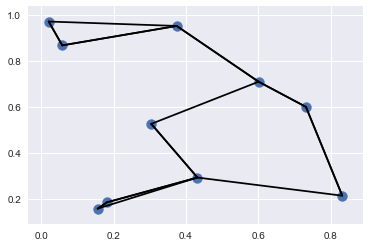

In [33]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition_idx[i, :K+1]:
        # plot a line from X[i] to X[j], using some zip magic to make it happen
        plt.plot(*zip(X[j], X[i]), color='black')
